In [7]:
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Flatten
from keras.optimizers import SGD
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

In [ ]:
# load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = mnist.load_data()

    # reshape dataset to single channel
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    testX = testX.reshape((testX.shape[0], 28, 28, 1))

    # one hot encoding target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)

    return trainX, trainY, testX, testY

In [3]:
trainX, trainY, testX, testY = load_dataset()

In [4]:
# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')

    # normalize to ranges 0-1
    train_norm /= 255.0
    test_norm /= 255.0

    # return normalized images
    return train_norm, test_norm

In [5]:
trainX, testX = prep_pixels(trainX, testX)

In [12]:
# define cnn model
def define_model():
    model = Sequential()
    model.add(Input(shape=(28,28,1)))
    model.add(Conv2D(32, (3,3), activation="relu", kernel_initializer="he_uniform"))
    model.add(MaxPooling2D((2,2)))
    model.add(Flatten())
    model.add(Dense(100, activation="relu"))
    model.add(Dense(10, activation="softmax"))

    # compile model
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

    return model

In [13]:
model = define_model()
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │       540,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 542,230 (2.07 MB)

 Trainable params: 542,230 (2.07 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = model.fit(trainX, trainY, batch_size=128, epochs=25, verbose=True, validation_data=(testX, testY))

Epoch 1/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.8550 - loss: 0.4600 - val_accuracy: 0.9573 - val_loss: 0.1446
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9618 - loss: 0.1245 - val_accuracy: 0.9723 - val_loss: 0.0911
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9726 - loss: 0.0887 - val_accuracy: 0.9661 - val_loss: 0.1085
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9789 - loss: 0.0696 - val_accuracy: 0.9792 - val_loss: 0.0625
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9841 - loss: 0.0507 - val_accuracy: 0.9811 - val_loss: 0.0588
Epoch 6/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9870 - loss: 0.0428 - val_accuracy: 0.9809 - val_loss: 0.0562
Epoch 7/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9893 - loss: 0.0364 - val_accuracy: 0.9843 - val_loss: 0.0459
Epoch 8/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9914 - loss: 0.0294 - val

In [15]:
loss, accuracy = model.evaluate(testX, testY, verbose=True)

print("Loss:", loss)
print("Accuracy:", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9820 - loss: 0.0558
Loss: 0.04407463222742081
Accuracy: 0.986299991607666


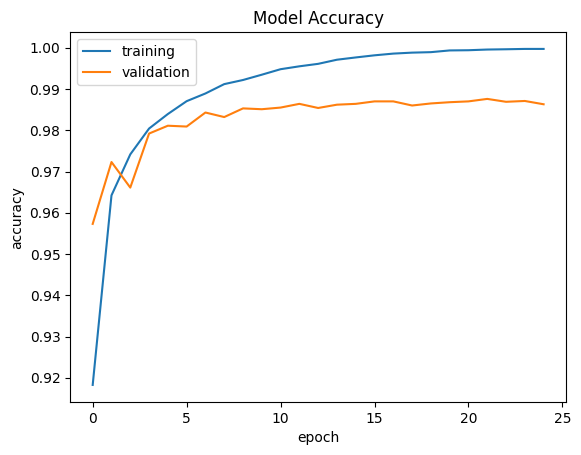

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

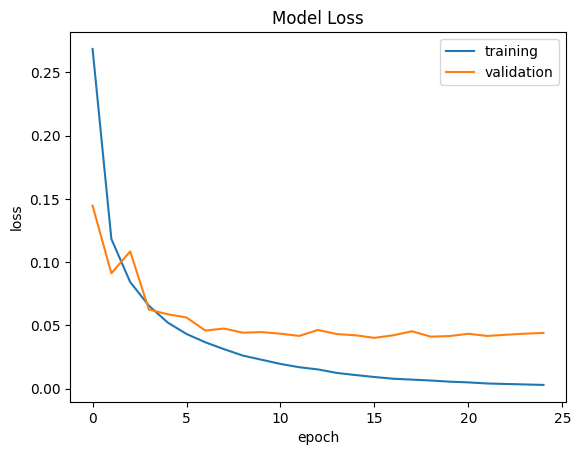

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

In [18]:
y_pred = model.predict(testX)

y_pred = np.argmax(y_pred, 1) # decode predicted labels
y_test = np.argmax(testY, 1) # decode labels

mat = confusion_matrix(y_test, y_pred)
print(mat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[[ 973    1    0    0    1    0    3    1    1    0]
 [   0 1129    1    1    0    1    1    1    1    0]
 [   5    1 1010    2    1    0    1    6    6    0]
 [   0    0    0 1000    0    3    0    2    4    1]
 [   0    0    1    0  975    0    3    0    0    3]
 [   2    0    0    6    0  879    4    1    0    0]
 [   4    2    0    0    2    2  945    0    3    0]
 [   0    1    4    1    3    0    0 1014    4    1]
 [   3    1    1    1    1    1    1    2  960    3]
 [   2    2    0    3   15    3    0    3    3  978]]
